In [0]:
!pip3 install torch==1.2.0+cu92 torchvision==0.4.0+cu92 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [0]:
 import torch
 import torchvision
 from torchvision import transforms,datasets


In [0]:
train=datasets.MNIST("",train=True,download=True,transform=transforms.Compose([transforms.ToTensor()]))
test=datasets.MNIST("",train=False,download=True,transform=transforms.Compose([transforms.ToTensor()]))

In [0]:
# Eğer Could not import PILLOW_VERSION from PIL Hatası verirse Çalıştır
pip install "pillow<7"

In [0]:
traindata=torch.utils.data.DataLoader(train,batch_size=10,shuffle=True)
testdata=torch.utils.data.DataLoader(test,batch_size=10,shuffle=True)

In [0]:
for data in traindata:
  print(data)
  break

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

In [0]:
x,y=data[0][0], data[1][0]
print(y)
print(data[0][0].shape)

tensor(5)
torch.Size([1, 28, 28])


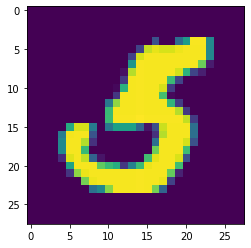

In [0]:
import matplotlib.pyplot as plt
plt.imshow(data[0][0].view(28,28))# 28 X 28 image
plt.show()

In [0]:
import torch.nn as nn 
import torch.nn.functional as F 


In [0]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1=nn.Linear(28*28,64) #input, output shape
    self.fc2=nn.Linear(64,64)
    self.fc3=nn.Linear(64,64)
    self.fc4=nn.Linear(64,10) # output is 10 because class number it is.
  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=F.relu(self.fc3(x))
    x=self.fc4(x)
    return F.log_softmax(x,dim=1)

    return x
# Model SUM
net=Net()
print(net)

# optimizer
import torch.optim as optim
optimizer=optim.Adam(net.parameters(),lr=0.001)
EPOCH= 5

for epoch in range(EPOCH):
  for data in traindata:
    X,y=data
    net.zero_grad()# low gpu or cpu method
    output=net(X.view(-1,28*28))
    loss=F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print("Loss:",loss)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)
Loss: tensor(0.4861, grad_fn=<NllLossBackward>)
Loss: tensor(0.1469, grad_fn=<NllLossBackward>)
Loss: tensor(0.0974, grad_fn=<NllLossBackward>)
Loss: tensor(0.0009, grad_fn=<NllLossBackward>)
Loss: tensor(0.1936, grad_fn=<NllLossBackward>)


In [0]:
correct=0
total=0
with torch.no_grad():
  for data in traindata:
    X,y=data
    output=net(X.view(-1,784))
    for idx,i in enumerate(output):
      if(torch.argmax(i)==y[idx]):
        correct+=1
      total+=1
print("Accuracy: ",round(correct/total,3))

Accuracy:  0.975


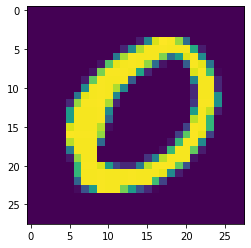

In [0]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [0]:
print(torch.argmax(net(X[0].view(-1,784))))

tensor(0)
